<a href="https://colab.research.google.com/github/SofiaRguez1020/Topicos_Industria_I/blob/main/TI_1_Practica2_Sofia_Rodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Sofia Daniela Rodriguez Saenz

**e-mail:** sofia.rodriguez5540@alumnos.udg.mx

## MODULES

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [ ]:
#Init Params
m = 3.0
beta = 0
n_curves = 10

#Creates aux domain for levy distribution resolution
aux_domain = np.linspace(m-5, m+5, 500)

#Create a list of alpha values based on the number of curves and randomly select values from 0.1 to 2
values = np.arange(0.1, 2.1, 0.1)
alpha_vals = np.random.choice(values, size=n_curves, replace=False)
alpha_vals = np.sort(alpha_vals)
#Create aux variable to save all curves
levy_curves = {}

#Create n levy distribution curves
for i in range(n_curves):
  levy_pdf = np.array(levy_stable.pdf(aux_domain, alpha=alpha_vals[i], beta=beta, loc=m))
  #Rounds numbers to avoid getting a lot of decimal numbers when cast as str
  levy_curves['Levy_'+str(np.round(alpha_vals[i],1))] = levy_pdf


In [ ]:

#Creates plotly object
fig_Levy_pdf = go.Figure()

#Graph all PDF curves
for name, levy_pdf in levy_curves.items():
  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y = levy_pdf,
                                    marker = dict(size=2),
                                    mode = 'lines',
                                    name = name,
                                    showlegend = True))

#Set title
fig_Levy_pdf.update_layout(title_text = 'Levy PDF N_Curves')
#Show PDF curves
fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.

In [ ]:
#Init vars
sample_size = 1500
alpha = 1.9
beta = 0
m = 0.0

#Aux domain var for Levy PDF
aux_domain = np.linspace(m-5, m+5, 500)

#Get histogram based on levy stable distribution
r = levy_stable.rvs(alpha, beta, size=sample_size, loc=m)

#Get levy PDF based on same values
levy_pdf = np.array(levy_stable.pdf(aux_domain, alpha=alpha, beta=beta, loc=m))


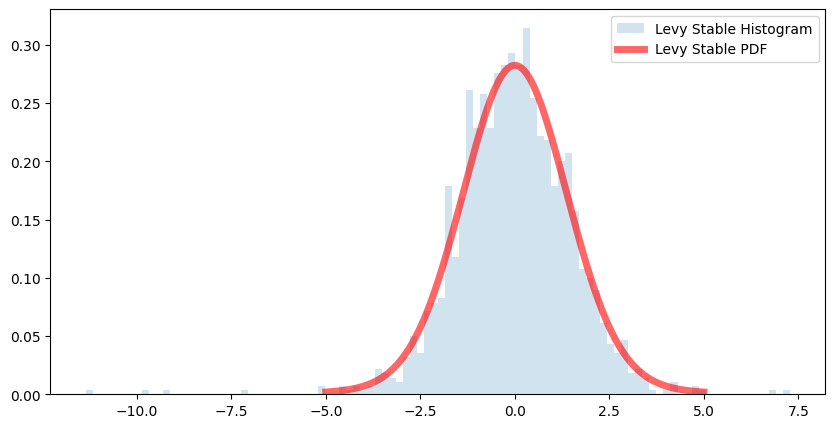

In [ ]:
#Graph PDF and histogram
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='Levy Stable Histogram')
ax.plot(aux_domain, levy_pdf, 'r-', lw=5, alpha=0.6, label='Levy Stable PDF')
ax.legend(loc='best')

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [20]:
# Init parameters
alpha = 1.5
beta = 0

CRW_exponent = 0.3

n_steps = 1000
s_pos = [0, 0]
speed = 6

# Init velocity vector
velocity = Vec2d(speed,0)

#Brownian Walker object initialization
BM_2d = pd.DataFrame([{'x_pos':s_pos[0], 'y_pos':s_pos[1]}])

for i in range(1,n_steps):
  # Select turning point
  turn_angle = wrapcauchy.rvs(c=CRW_exponent)#np.random.uniform(low=0, high = 2*np.pi)

  #Randomly select how many steps take in the same direction
  step_size = levy_stable.rvs(alpha=alpha, beta=beta)

  #step_size = np.clip(step_size, steps_min, steps_max)
  velocity = velocity.rotated(turn_angle)

  # Update location
  temp = pd.DataFrame([{'x_pos':BM_2d.x_pos[i -1 ]+(velocity.x*step_size), 'y_pos':BM_2d.y_pos[i - 1]+(velocity.y*step_size)}])
  BM_2d = pd.concat([BM_2d, temp], ignore_index = True)


In [22]:
time = 10
times_aux = np.linspace(0,time,n_steps)

In [25]:
fig_3d = go.Figure()

fig_3d.add_trace(go.Scatter3d(x=BM_2d.x_pos,
                            y=BM_2d.y_pos,
                            z=times_aux,
                            marker=dict(size=2),
                            line=dict(width=2),
                            mode='lines',
                            name='levy',
                            showlegend=True))

fig_3d.update_layout(scene=dict(
                    xaxis_title='x_pos (mm)',
                    yaxis_title='y_pos (mm)',
                    zaxis_title='Time'))

fig_3d.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.

In [60]:
#Init parameters
n_steps = 1000
s_pos = 0
speed = 6
n_traj = 15


#Init DFs
CRW_df = pd.DataFrame(columns=['Cauchy', 'x_pos', 'y_pos'])

for traj in range(n_traj):
  #Randomly select CRW
  CRW_exponent = np.random.uniform(low=0, high=1)

  # Init velocity vector
  velocity = Vec2d(speed,0)

  #Init temp data array
  temp = np.ones(shape=(n_steps,2))*s_pos

  for i in range(1, n_steps):
    # Select turn angle
    turn_angle = wrapcauchy.rvs(c=CRW_exponent)
    #
    velocity = velocity.rotated(turn_angle)
    #Update position
    temp[i,0] = temp[i-1,0]+velocity.x
    temp[i,1] = temp[i-1,1]+velocity.y

  traj_df = pd.DataFrame({'Cauchy':CRW_exponent, 'x_pos':[temp[:,0]], 'y_pos':[temp[:,1]]})
  CRW_df = pd.concat ([CRW_df,traj_df], ignore_index=True)



In [53]:
time = 10
times_aux = np.linspace(0,time,n_steps)

In [61]:
fig_3d = go.Figure()

for index, row in CRW_df.iterrows():
  fig_3d.add_trace(go.Scatter3d(x=row['x_pos'],
                              y=row['y_pos'],
                              z=times_aux,
                              marker=dict(size=2),
                              line=dict(width=2),
                              mode='lines',
                              name='CRW, Cauchy_'+str(np.round(row['Cauchy'],3)),
                              showlegend=True))

fig_3d.update_layout(scene=dict(
                    xaxis_title='x_pos (mm)',
                    yaxis_title='y_pos (mm)',
                    zaxis_title='Time'))

fig_3d.show()